# 하나의 뉴스 기사에서
# 가장 많은 빈도수 순으로 등장하는 
# '한글 단어' 를
# 워드클라우드로 표현

In [24]:
# 필요한 모듈

import urllib.parse      # url 을 불러와 파싱하기 위한 모듈
import lxml.html         # html 함수 사용을 위한 모듈
import requests          # uml 의 오류를 확인하기 위한 모듈
import pandas as pd      # 기사 내용의 정보를 저장하기 위한
                          # 새로운 데이터 프레임을 만들기 위한 모듈
from sklearn.feature_extraction.text import CountVectorizer
                        # 각 단어들의 등장횟수를 측정하기 위한 모듈
from selenium.webdriver import Chrome
                        # 크롬으로 사용하기 셀레니움 모듈 (여기선 굳이...)
import konlpy          # 한글 형태소 정리를 위한 모듈


In [25]:
# url 지정
p = urllib.parse.urlparse('http://www.donga.com/news/article/all/20200427/100824126/2')

In [26]:
url = 'http://www.donga.com/news/article/all/20200427/100824126/2'
res = requests.get(url)

res.status_code
# 응답의 상태 코드를 확인하면 200번을 얻는다.

200

In [27]:
# uml의 정보 저장하여 읽어오기
root = lxml.html.fromstring(res.text)
res.text

'<!doctype html>\n<html lang="ko">\n<head>\n<title>[전문]文대통령 “코로나19, 남북 협력의 기회…현실·실천적 길 찾겠다”</title>\n<meta http-equiv=\'Content-Type\' content=\'text/html; charset=utf-8\'>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name=\'description\' content="문재인 대통령은 4&middot;27 판문점 선언 2주년을 맞은 27일 &ldquo;코로나19 위기가 남북협력의 새로운 기회일 수 있다&rdquo;며 &ldquo;가장 현실적이고 실천적인 남북협력의 길 찾아 나서겠다&rdquo;고 밝&hellip;">\n<meta name=\'writer\' content=\'동아닷컴\'>\n<meta name=\'dailymotion-domain-verification\' content=\'dm86e6xoulnfokzid\' />\n<link rel="image_src" href="https://dimg.donga.com/wps/NEWS/IMAGE/2020/04/27/100823505.3.jpg" />\n<link rel="canonical" href="http://www.donga.com/news/article/all/20200427/100824126/2" />\n<link rel=\'amphtml\' href=\'http://www.donga.com/news/amp/all/20200427/100824126/2\' />\n\n<meta property="og:title" content="[전문]文대통령 “코로나19, 남북 협력의 기회…현실·실천적 길 찾겠다”" />\r\n<meta property=\'og:image\' content=\'https://dimg.donga.com/a/600/0/90/5/wps/NEWS/IMAGE/2020/04/27/100823

In [28]:
root = lxml.html.fromstring(res.text)
root

<Element html at 0x15d3ca35c78>

In [29]:
# html 코드 중, 기사 본문 내용만을 선택
root.cssselect('.news mynews section _prs_nws')

[]

In [30]:
content = root.cssselect(".article_txt")[0].text_content()

In [31]:
# 기사 본문 내용 확인
content

"\n            \n            문재인 대통령은 4·27 판문점 선언 2주년을 맞은 27일 “코로나19 위기가 남북협력의 새로운 기회일 수 있다”며 “가장 현실적이고 실천적인 남북협력의 길을 찾아 나서겠다”고 밝혔다.문 대통령은 이날 오후 청와대에서 열린 수석·보좌관 회의에서 “판문점 선언은 되돌릴 수 없는 평화의 문을 열었지만, 그로부터 지난 2년은 평화는 하루아침에 오지 않는다는 것을 다시 한번 절감하게 한 기간이었다”며 이같이 말했다.문 대통령은 “남북의 정상이 역사적 판문점 선언을 한지 2년이 되었다”며 “저와 김정은 위원장이 손을 잡고 함께 군사분계선을 오가는 장면은 8000만 겨레와 전 세계에 벅찬 감동을 주었고, 두 정상이 합의한 판문점 선언은 전쟁 없는 평화로 가는 새로운 한반도 시대의 서막을 열었다”고 말했다.\n\n  window.googletag = window.googletag || {cmd: []};\n  googletag.cmd.push(function() {\n    googletag.defineSlot('/1249652/Donga_OSV_Desktop_1x1', [1, 1], 'div-gpt-ad-1571163856651-0').addService(googletag.pubads());\n    googletag.pubads().enableSingleRequest();\n    googletag.pubads().collapseEmptyDivs();\n    googletag.enableServices();\n  });\n\n\n  \n    googletag.cmd.push(function() { googletag.display('div-gpt-ad-1571163856651-0'); });\n  \n이어 “판문점 선언은 9·19 남북공동선언과 남북군사합의로 이어졌고, 남북관계를 새 단계로 진입시키는 출발점이 되었다”며 “판문점 선언 실천을 속도내지 못한 건 결코 우리 의지가 부족해서가 아니다. 현실적으로 존재하는 

In [32]:
# !pip install konlpy

In [33]:
# 형태소 정리를 위해 konlpy 를 사용하여
# 한글의 형태를 정리

okt = konlpy.tag.Okt()
article_arr = okt.morphs(content)
print(article_arr)

['\n            \n            ', '문재인', '대통령', '은', '4', '·', '27', '판문점', '선언', '2', '주년', '을', '맞은', '27일', '“', '코로나', '19', '위기', '가', '남북', '협력', '의', '새로운', '기회', '일', '수', '있다', '”', '며', '“', '가장', '현실', '적', '이고', '실천', '적', '인', '남북', '협력', '의', '길', '을', '찾아', '나서겠다', '”', '고', '밝혔다', '.', '문', '대통령', '은', '이', '날', '오후', '청와대', '에서', '열린', '수석', '·', '보좌', '관', '회의', '에서', '“', '판문점', '선언', '은', '되돌릴', '수', '없는', '평화', '의', '문', '을', '열었지만', ',', '그로', '부터', '지난', '2년', '은', '평화', '는', '하루아침', '에', '오지', '않는다는', '것', '을', '다시', '한번', '절감', '하게', '한', '기간', '이었다', '”', '며', '이같이', '말', '했다', '.', '문', '대통령', '은', '“', '남북', '의', '정상', '이', '역사', '적', '판문점', '선언', '을', '한지', '2년', '이', '되었다', '”', '며', '“', '저', '와', '김정은', '위원장', '이', '손', '을', '잡고', '함께', '군사분계선', '을', '오가는', '장면', '은', '8000만', '겨레', '와', '전', '세계', '에', '벅찬', '감동', '을', '주었고', ',', '두', '정상', '이', '합의', '한', '판문점', '선언', '은', '전쟁', '없는', '평화로', '가는', '새로운', '한반도', '시대', '의', '서막', '을', '열었다', '”', '고', '말

In [34]:
# 한글을 새로 저장할 변수 article 을 생성
# 이후 저장되는 변수를 ' ' 으로 구분할 것이기에
# 초기값을 ' ' 로 지정

article = ' '

In [35]:
# 기사 본문 내용 중, '명사' 에 해당하는 단어만 추려서 따로 저장

for word in okt.pos(content): 
    if word[1] in ['Noun']: #명사만
        article += (word[0] + ' ')
        print(word[0])

문재인
대통령
판문점
선언
주년
코로나
위기
남북
협력
기회
일
수
며
가장
현실
실천
남북
협력
길
고
문
대통령
날
오후
청와대
수석
보좌
관
회의
판문점
선언
수
평화
문
그로
지난
평화
하루아침
오지
것
다시
한번
절감
기간
며
말
문
대통령
남북
정상
역사
판문점
선언
한지
며
저
김정은
위원장
손
잡고
군사분계선
장면
겨레
전
세계
감동
두
정상
합의
판문점
선언
전쟁
평화로
한반도
시대
서막
고
말
판문점
선언
남북
선언
남북
합의
남북관계
새
단계
진입
출발점
며
판문점
선언
실천
속도
내지
못
건
결코
우리
의지
현실
존재
국제
제약
때문
기사
코로나
남북
협력
기회
현실
실천
길
판문점
김정은
숨소리
당국자
큰일
의료
진
명
방북설
코로나
대응
진료
조언
우리
현실
제약
요인
속
수
일이
실천
며
김정은
북한
국무위원
사이
신뢰
평화
대한
의지
바탕
평화
경제
미래
고
말
또
문
대통령
한반도
운명
주인
우리
자신
사실
우리
리기
마련
점차
길
수
것
라며
가장
현실
실천
남북
협력
길
고
지난
김정은
위원장
친서
우리
국민
위로
응원
저
이
화답
며
남
북
하나
생명
공동체
남북
생명
공동체
평화
공동체
토대
것
말
코로나
를
공동
대처
협력
시작
가축
전염병
접경
지역
재해
재난
기후
환경
변화
공동
대응
등
생명
한반도
위
남북
교류
협력
적극
며
분단
상징
평화
희망
체제
힘
고
정봉
오
동아닷컴
기자
문재인
대통령
수석
보좌
관
회의
발언
남북
정상
역사
판문점
선언
한지
그때
감동
기억
저
김정은
위원장
손
잡고
군사분계선
장면
겨레
전
세계
감동
두
정상
합의
판문점
선언
전쟁
평화로
한반도
시대
서막
판문점
선언
남북
선언
남북
합의
남북관계
새
단계
진입
출발점
또
사상
최초
북미
정상회담
성사
밑거름
판문점
선언
수
평화
문
그로
지난
평화
하루아침
오지
것
다시
한번
절감
기간
기대
실망
반복
그때
인내
발걸음
평화
프로세스
진전
위해
노력
기간
판문점
선언
실천
속도
내지
못
건
결코
우리
의지
현실
존재
국제
제약
때문

In [36]:
# 저장된 명사 확인
article

' 문재인 대통령 판문점 선언 주년 코로나 위기 남북 협력 기회 일 수 며 가장 현실 실천 남북 협력 길 고 문 대통령 날 오후 청와대 수석 보좌 관 회의 판문점 선언 수 평화 문 그로 지난 평화 하루아침 오지 것 다시 한번 절감 기간 며 말 문 대통령 남북 정상 역사 판문점 선언 한지 며 저 김정은 위원장 손 잡고 군사분계선 장면 겨레 전 세계 감동 두 정상 합의 판문점 선언 전쟁 평화로 한반도 시대 서막 고 말 판문점 선언 남북 선언 남북 합의 남북관계 새 단계 진입 출발점 며 판문점 선언 실천 속도 내지 못 건 결코 우리 의지 현실 존재 국제 제약 때문 기사 코로나 남북 협력 기회 현실 실천 길 판문점 김정은 숨소리 당국자 큰일 의료 진 명 방북설 코로나 대응 진료 조언 우리 현실 제약 요인 속 수 일이 실천 며 김정은 북한 국무위원 사이 신뢰 평화 대한 의지 바탕 평화 경제 미래 고 말 또 문 대통령 한반도 운명 주인 우리 자신 사실 우리 리기 마련 점차 길 수 것 라며 가장 현실 실천 남북 협력 길 고 지난 김정은 위원장 친서 우리 국민 위로 응원 저 이 화답 며 남 북 하나 생명 공동체 남북 생명 공동체 평화 공동체 토대 것 말 코로나 를 공동 대처 협력 시작 가축 전염병 접경 지역 재해 재난 기후 환경 변화 공동 대응 등 생명 한반도 위 남북 교류 협력 적극 며 분단 상징 평화 희망 체제 힘 고 정봉 오 동아닷컴 기자 문재인 대통령 수석 보좌 관 회의 발언 남북 정상 역사 판문점 선언 한지 그때 감동 기억 저 김정은 위원장 손 잡고 군사분계선 장면 겨레 전 세계 감동 두 정상 합의 판문점 선언 전쟁 평화로 한반도 시대 서막 판문점 선언 남북 선언 남북 합의 남북관계 새 단계 진입 출발점 또 사상 최초 북미 정상회담 성사 밑거름 판문점 선언 수 평화 문 그로 지난 평화 하루아침 오지 것 다시 한번 절감 기간 기대 실망 반복 그때 인내 발걸음 평화 프로세스 진전 위해 노력 기간 판문점 선언 실천 속도 내지 못 건 결코 우리 의지 현실 존재 국제 제약 

In [37]:
# 카운트 벡터라이저 = 워드의 갯수를 세는 함수
# stop_word='english' 를 이용해 행여라도 존재할 특수문자, 혹은
# 조사에 의한 구분을 한번 더 사용

cv = CountVectorizer(stop_words='english')  
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [38]:
# cv 함수를 이용하여 정리한 article 의 내용을 카운팅

tdm = cv.fit_transform([article]).toarray()
tdm

array([[ 1,  7,  2,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  2,  1,  2,
         1,  1,  4,  1,  5,  6,  2,  1,  1,  1,  2,  2,  5,  1,  3,  1,
         2,  2,  2,  2,  3,  1,  1,  1,  2,  2,  1,  1,  1,  5,  2,  1,
         1,  1,  9,  1,  1, 21,  2,  1,  1,  2,  1,  1,  1,  2,  3,  2,
         1,  1,  3,  2,  6,  4,  1,  1,  1,  1,  1,  1,  1,  3,  1,  2,
         1,  2,  1,  1,  1,  1,  1,  2,  2,  3,  1,  1,  2,  2,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  3,  2,  2,  1,  1,
         3,  2,  1,  1,  1,  1,  2,  3,  2,  1,  1,  1,  1,  2,  1,  1,
         4,  6,  2,  1, 15,  1,  1,  7,  1,  3,  1,  2,  1,  1,  4,  3,
         1,  2,  1,  9,  1,  1,  1,  2,  1,  1,  1,  1,  2,  2,  2,  2,
         1,  1,  2,  1,  1,  1,  1,  2, 16,  2,  3,  2,  1,  4,  1,  1,
         1,  2,  2,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1, 10,  2,  1,
         1,  2,  1,  2,  1,  2,  2,  2,  2,  1,  1,  2,  6,  1,  1,  2,
         1,  1,  2,  2,  1,  1,  1,  5,  1,  1,  1,  4,  2,  1, 

In [39]:
# 데이터 프레임으로 생성

df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [40]:
df

,word,freq
0,가능성,1
1,가장,7
2,가축,2
3,가치,1
4,각오,1
...,...,...
289,회복,1
290,회의,2
291,횡설수설,1
292,후계,1


In [41]:
# 빈도수가 높은것부터 정렬

df.sort_values('freq', ascending=False).head(20) # 빈도수 정렬

,word,freq
53,남북,21
168,우리,16
266,평화,16
263,판문점,15
282,협력,15
132,선언,15
258,코로나,14
189,일상,10
147,실천,9
50,김정은,9


In [42]:
from wordcloud import WordCloud
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
#wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

wc.fit_words(frequencies)

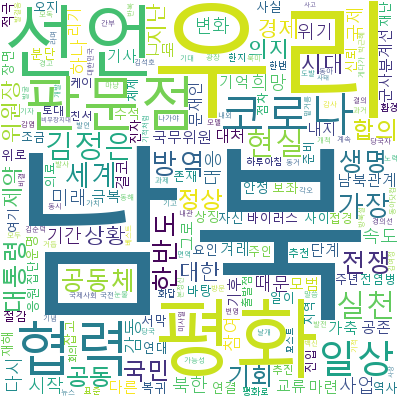

In [43]:
wc.to_image()